In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt

data = {'moon': ['Phobos', 'Deimos', 'Moon'],
        'Diameter_km': [22.4, 12.4, 3475],
        'Planet_name': ['Mars','Mars','Earth'],
        'Planet_Mass_kg': [6.39e23,6.39e23,5.97e24], # Mars or Earth
        'Orbital_Distance_km': [9376,23463, 384400]

}
df = pd.DataFrame(data)

print(df)

     moon  Diameter_km Planet_name  Planet_Mass_kg  Orbital_Distance_km
0  Phobos         22.4        Mars    6.390000e+23                 9376
1  Deimos         12.4        Mars    6.390000e+23                23463
2    Moon       3475.0       Earth    5.970000e+24               384400


In [8]:
# Normalize Datasets
df['Diameter_norm'] = df['Diameter_km'] / df['Diameter_km'].max()
df['Mass_norm'] = df['Planet_Mass_kg'] / df['Planet_Mass_kg'].max()
df['Distance_norm'] = df['Orbital_Distance_km'] / df['Orbital_Distance_km'].max()

X = torch.tensor(df[['Diameter_norm', 'Mass_norm']].values, dtype=torch.float32)
y = torch.tensor(df['Distance_norm'].values.reshape(-1, 1), dtype=torch.float32)


In [9]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.ReLU(),
    nn.Linear(8, 1)
)

In [12]:
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()
epochs = 85000
losses = []

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()

    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if epoch % 800 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.6f}")


Epoch 0, Loss: 0.000230
Epoch 800, Loss: 0.000224
Epoch 1600, Loss: 0.000217
Epoch 2400, Loss: 0.000240
Epoch 3200, Loss: 0.000203
Epoch 4000, Loss: 0.000435
Epoch 4800, Loss: 0.000187
Epoch 5600, Loss: 0.000178
Epoch 6400, Loss: 0.000169
Epoch 7200, Loss: 0.000161
Epoch 8000, Loss: 0.000151
Epoch 8800, Loss: 0.000025
Epoch 9600, Loss: 0.000001
Epoch 10400, Loss: 0.000000
Epoch 11200, Loss: 0.000000
Epoch 12000, Loss: 0.000000
Epoch 12800, Loss: 0.000000
Epoch 13600, Loss: 0.000000
Epoch 14400, Loss: 0.000000
Epoch 15200, Loss: 0.000000
Epoch 16000, Loss: 0.000000
Epoch 16800, Loss: 0.000154
Epoch 17600, Loss: 0.000147
Epoch 18400, Loss: 0.000140
Epoch 19200, Loss: 0.000132
Epoch 20000, Loss: 0.000127
Epoch 20800, Loss: 0.000136
Epoch 21600, Loss: 0.000109
Epoch 22400, Loss: 0.000103
Epoch 23200, Loss: 0.000097
Epoch 24000, Loss: 0.000091
Epoch 24800, Loss: 0.000085
Epoch 25600, Loss: 0.000082
Epoch 26400, Loss: 0.000076
Epoch 27200, Loss: 0.000071
Epoch 28000, Loss: 0.000079
Epoch 288

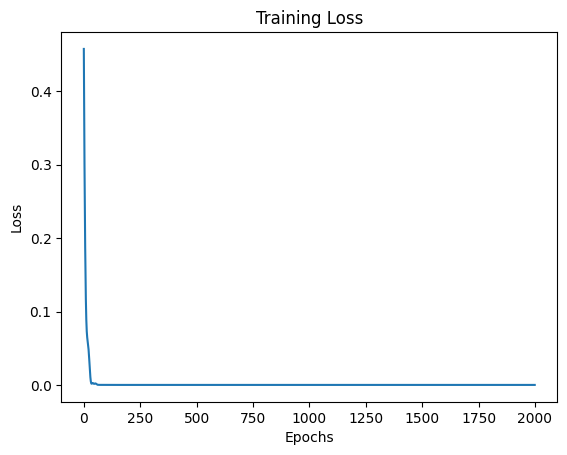

In [11]:
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()